# Linear regression

This code fits a multi-output linear regression model to predict the meshed dendritic field, effectively training one linear model per pixel. While the model achieves low MSE on both training and testing sets, visual reconstruction of the predicted images reveals average performance.


An outlier is found along the way.

Since both the training and testing MSE were low, we could be underfitting. Therefore, we suggested adding complexity to our model.

In [17]:
# Cell 0
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import itertools
import matplotlib.animation as animation

In [2]:
# Cell 1

# Load the data with correct filenames
X_train = np.load("X_train.npy")
y_train = np.load("Y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("Y_test.npy")

In [3]:
# Cell 1
#  Flatten outputs (if needed)
y_train_flat = y_train.reshape(y_train.shape[0], -1)
y_test_flat = y_test.reshape(y_test.shape[0], -1)

In [4]:
# Cell 2

# Train Linear Regression model 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_flat)

# Predict on training data 
y_train_pred_flat = linear_model.predict(X_train)
y_train_pred_flat = np.clip(y_train_pred_flat,0,1)

# Compute MSE on training set
mse_train = mean_squared_error(y_train_flat, y_train_pred_flat)
print(f"✅ Training Set MSE: {mse_train:.6f}")

# Compute residuals
residuals = y_train_flat - y_train_pred_flat

✅ Training Set MSE: 37441939576993632557370756624038518551545412672301527971076306495794957829488437723568911157536863697529241803210521137031022070146219303188251669807158139308549003135667807531195476741068518600831139840.000000


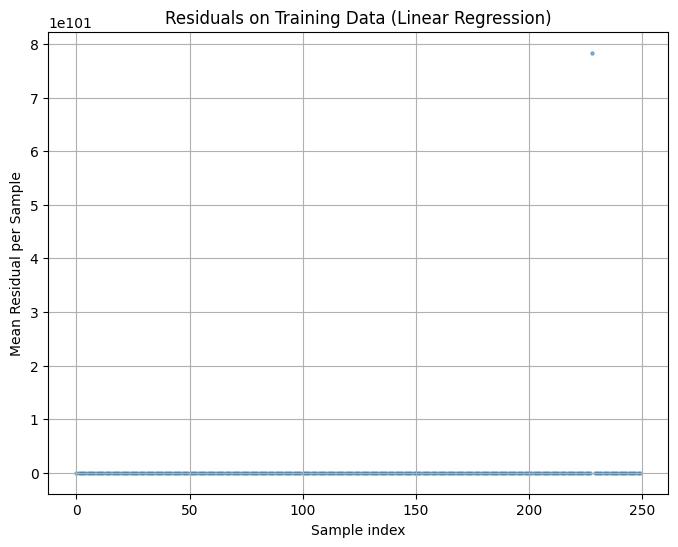

In [6]:
# Cell 3
# visualize residuals to conduct residual analysis

plt.figure(figsize=(8, 6))
plt.scatter(np.arange(residuals.shape[0]), residuals.mean(axis=1), alpha=0.5, s=5)
plt.xlabel('Sample index')
plt.ylabel('Mean Residual per Sample')
plt.title('Residuals on Training Data (Linear Regression)')
plt.grid(True)
plt.show()


We notice an outlier!

In [7]:
# Cell 4

# Step 1: Find the index of the maximum residual
outlier_index = np.argmax(np.abs(residuals.flatten()))
print(f"✅ Outlier found at flattened index: {outlier_index}")

# Since residuals are flattened, map back to sample index
sample_index = outlier_index // y_train_flat.shape[1]
print(f"✅ Corresponding training sample index: {sample_index}")


✅ Outlier found at flattened index: 2289344
✅ Corresponding training sample index: 228


In [8]:
# Cell 5

# Step 2: Remove the outlier sample
X_train_clean = np.delete(X_train, sample_index, axis=0)
y_train_flat_clean = np.delete(y_train_flat, sample_index, axis=0)

In [10]:
# Cell 6

# Step 3: Retrain the model
linear_model_clean = LinearRegression()
linear_model_clean.fit(X_train_clean, y_train_flat_clean)

# Predict again on cleaned training set
y_train_pred_flat_clean = linear_model_clean.predict(X_train_clean)
y_train_pred_flat_clean= np.clip(y_train_pred_flat_clean, 0, 1)

# Compute new residuals
residuals_clean = y_train_flat_clean - y_train_pred_flat_clean

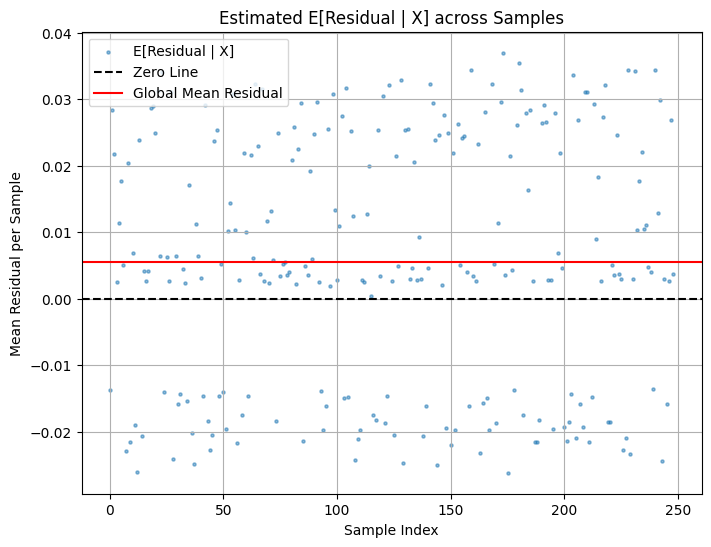

In [11]:
# Cell 7

# Compute mean residual per sample
mean_residual_per_sample = residuals_clean.mean(axis=1)

# Now plot the mean residuals
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(mean_residual_per_sample.shape[0]), mean_residual_per_sample, alpha=0.5, s=5, label="E[Residual | X]")
plt.axhline(y=0, color='black', linestyle='--', label='Zero Line')
plt.axhline(y=mean_residual_per_sample.mean(), color='red', linestyle='-', label='Global Mean Residual')
plt.xlabel('Sample Index')
plt.ylabel('Mean Residual per Sample')
plt.title('Estimated E[Residual | X] across Samples')
plt.legend()
plt.grid(True)
plt.show()



In [12]:
# Cell 8

print(f"✅ Mean of residuals after cleaning: {residuals_clean.mean():.6e}")

✅ Mean of residuals after cleaning: 5.584607e-03


In [13]:
# Cell 9

# Step 4: Recompute MSE
from sklearn.metrics import mean_squared_error
mse_train_clean = mean_squared_error(y_train_flat_clean, y_train_pred_flat_clean)
print(f"✅ Cleaned Training Set MSE: {mse_train_clean:.6f}")

# Test model again on original test set
y_test_pred_flat_clean = linear_model_clean.predict(X_test)
mse_test_clean = mean_squared_error(y_test_flat, y_test_pred_flat_clean)
print(f"✅ Test Set MSE After Cleaning: {mse_test_clean:.6f}")


✅ Cleaned Training Set MSE: 0.034467
✅ Test Set MSE After Cleaning: 0.040159


But now, let us see which residual did we get.

In [15]:
# Cell 10

# Define the grid exactly as before
param_grid = {
    "dT0": [-0.2, -0.4, -0.6, -0.8],
    "c": [0.005, 0.02, 0.05],
    "N": [4, 6, 8],
    "theta_deg": [0, 15, 30, 45],
    "seed_radius": [0.08, 0.1, 0.15]
}

keys = list(param_grid.keys())
combinations = list(itertools.product(*param_grid.values()))

# Get the combination at index 228
outlier_combination = combinations[228]

# Display it
outlier_params = dict(zip(keys, outlier_combination))
print(f"✅ Parameters for outlier index 228: {outlier_params}")


✅ Parameters for outlier index 228: {'dT0': -0.6, 'c': 0.005, 'N': 6, 'theta_deg': 0, 'seed_radius': 0.08}


Now , let us plot the outlier VS another "normal" dendrite field.

In [ ]:
# Cell 11

# Load the fields
# Load outlier dendrite field
xi_outlier = np.load("D:/dataset100100/xi_series_228.npy")

# Load a typical (non-outlier) dendrite for comparison (example: index 100)
xi_normal = np.load("D:/dataset100100/xi_series_100.npy")

In [ ]:
# Cell 12

# Choose a timestep to plot (example: last one) 
xi_outlier_final = xi_outlier[-1, :, :]
xi_normal_final = xi_normal[-1, :, :]

c:\Users\Georges\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


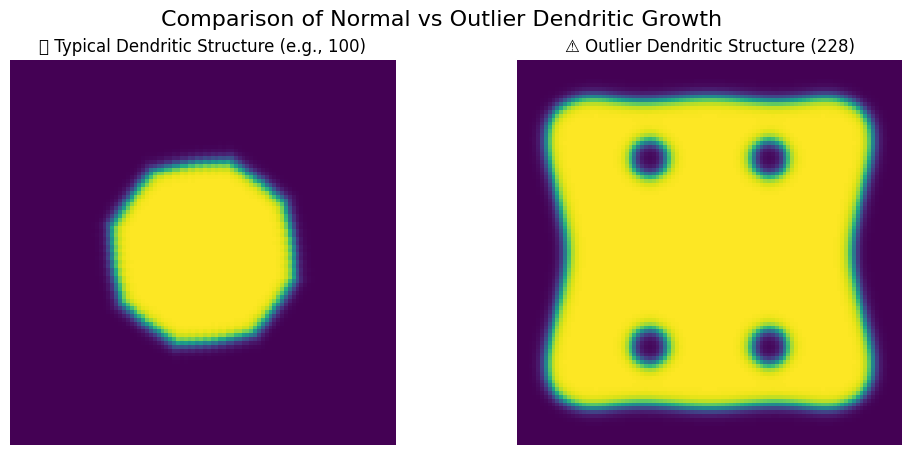

In [ ]:
# Cell 13

# Plot side-by-side 
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(xi_normal_final, cmap="viridis")
axs[0].set_title("✅ Typical Dendritic Structure (e.g., 100)")
axs[0].axis('off')

axs[1].imshow(xi_outlier_final, cmap="viridis")
axs[1].set_title("⚠️ Outlier Dendritic Structure (228)")
axs[1].axis('off')

plt.suptitle("Comparison of Normal vs Outlier Dendritic Growth", fontsize=16)
plt.show()


We can see how they are different.

Now let us see how the evolution is different.

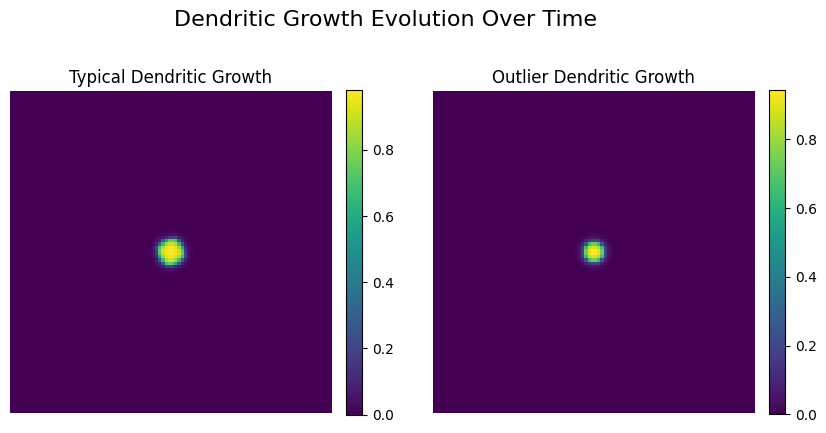

In [ ]:
# Cell 14

# Create the figure
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im_normal = axs[0].imshow(xi_normal[0], cmap="viridis")
im_outlier = axs[1].imshow(xi_outlier[0], cmap="viridis")

axs[0].set_title("Typical Dendritic Growth")
axs[1].set_title("Outlier Dendritic Growth")
axs[0].axis('off')
axs[1].axis('off')

# Colorbars
fig.colorbar(im_normal, ax=axs[0], fraction=0.046, pad=0.04)
fig.colorbar(im_outlier, ax=axs[1], fraction=0.046, pad=0.04)

# Main title
fig.suptitle("Dendritic Growth Evolution Over Time", fontsize=16)

# Create the dynamic timestep text (center bottom)
time_text = fig.text(0.5, 0.1, '', ha='center', va='center', fontsize=14, color='black')


In [ ]:
# Cell 15

# Update function
def update(frame):
    im_normal.set_array(xi_normal[frame])
    im_outlier.set_array(xi_outlier[frame])
    time_text.set_text(f"Timestep: {frame}")
    return im_normal, im_outlier, time_text



In [ ]:
# Cell 16

# Create the animation (blit=False important!)
ani = animation.FuncAnimation(fig, update, frames=xi_normal.shape[0], interval=100, blit=False)

# Save
Writer = animation.PillowWriter(fps=10)
ani.save('dendritic_evolution_final.gif', writer=Writer, dpi=200)

print("✅ 100% working: Timestep label shows and updates now.")

✅ 100% working: Timestep label shows and updates now.


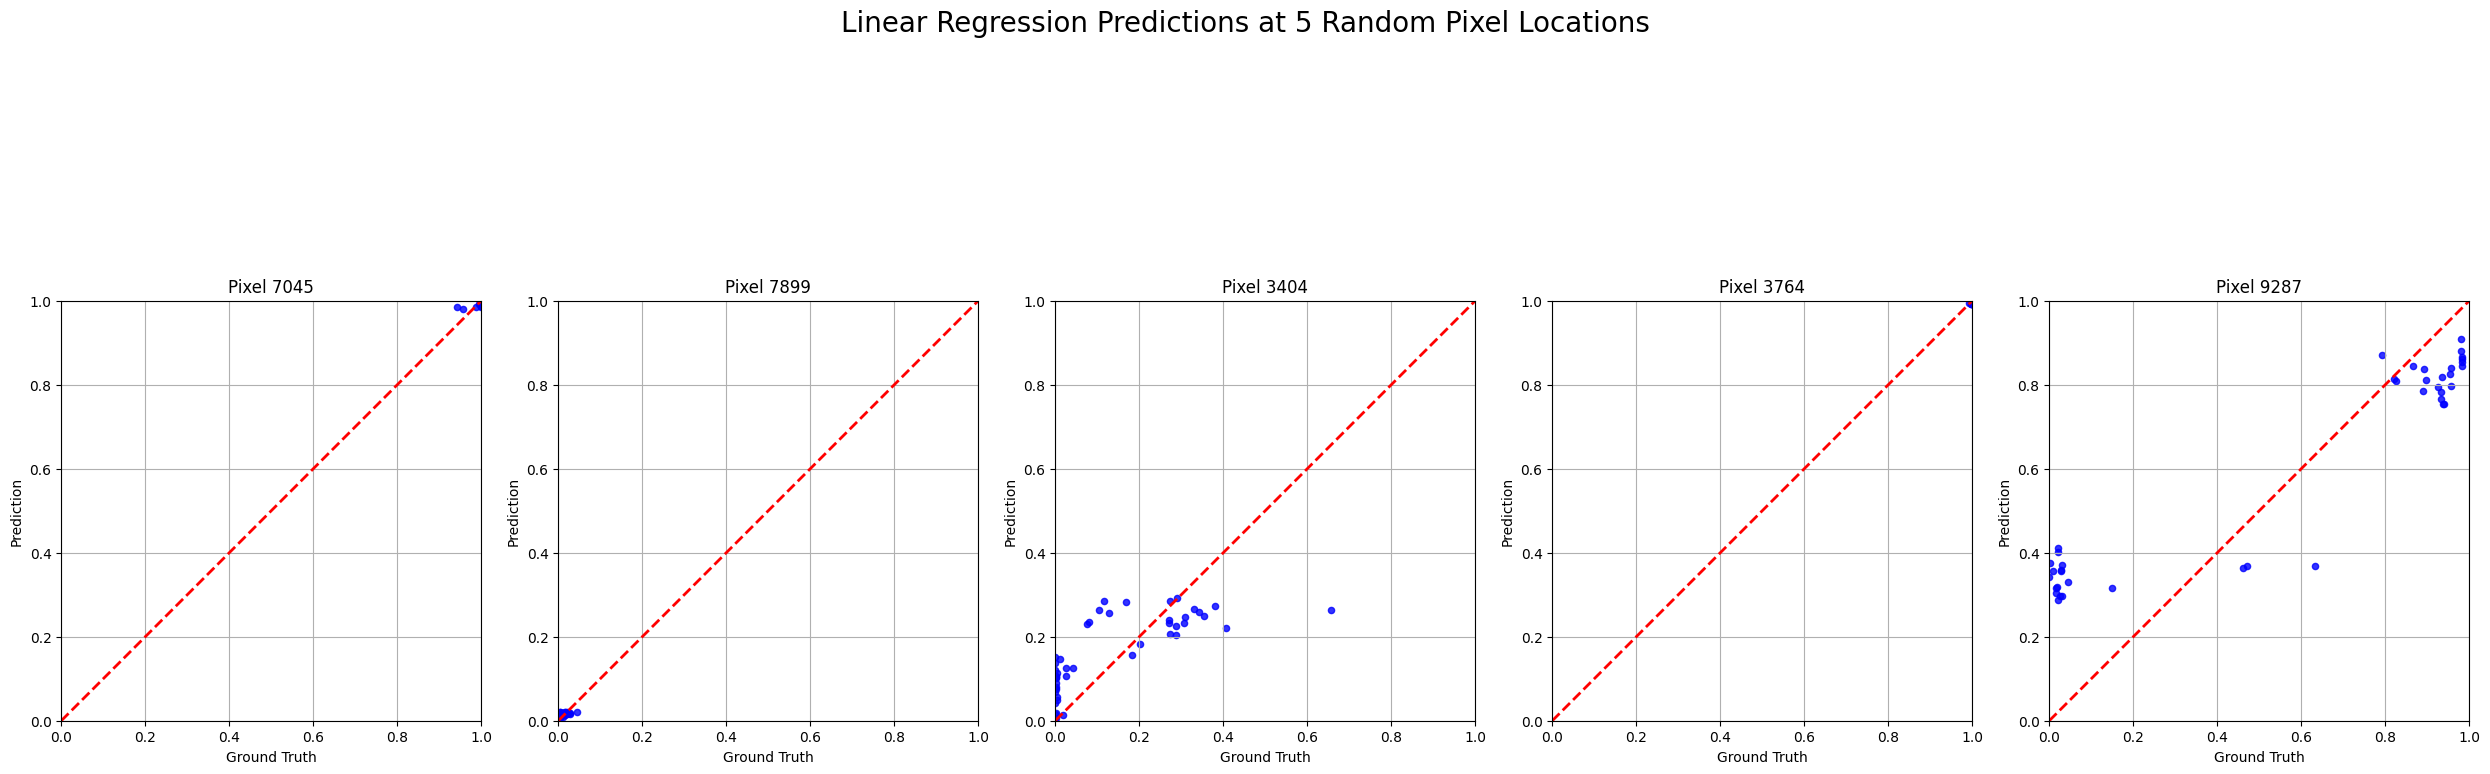

In [ ]:
# Cell 17

# Find n_pixels automatically
n_samples, n_pixels = y_test_flat.shape

# Choose 5 random pixels 
selected_pixels = np.random.choice(n_pixels, size=5, replace=False)

# Plot for each pixel
fig, axs = plt.subplots(1, 5, figsize=(25, 10))

for i, pixel_idx in enumerate(selected_pixels):
    ax = axs[i]
    
    # True and predicted at this pixel
    true_pixel = y_test_flat[:, pixel_idx]
    pred_pixel = y_test_pred_flat_clean[:, pixel_idx]
    
    # Scatter the points clearly
    ax.scatter(true_pixel, pred_pixel, alpha=0.8, s=20, color='blue', label="Predicted vs Ground Truth")
    
    # Plot the perfect prediction line y = x
    ax.plot([0, 1], [0, 1], 'r--', lw=2, label="Perfect Prediction (y=x)")
    
    # Labels and title
    ax.set_xlabel('Ground Truth')
    ax.set_ylabel('Prediction')
    ax.set_title(f'Pixel {pixel_idx}')
    ax.grid(True)
    ax.axis('square')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

plt.suptitle('Linear Regression Predictions at 5 Random Pixel Locations', fontsize=20)
plt.tight_layout()
plt.show()


In [20]:
# Cell 18

def reconstruct_predictions_linear(model, X_test_flat_clean, y_test_flat_clean, num_samples=5):
    """
    Reconstruct and plot clipped predictions vs. ground truth for selected test samples
    using a plain linear regression model (no polynomial features).
    
    Predictions are constrained to the [0, 1] interval.
    """
    # Predict and clip
    y_test_pred_flat = np.clip(model.predict(X_test_flat_clean), 0, 1)

    n_samples = y_test_flat_clean.shape[0]
    n_pixels = y_test_flat_clean.shape[1]
    
    # Select random samples
    selected_samples = np.random.choice(n_samples, size=num_samples, replace=False)
    print(f"Selected test sample indices: {selected_samples}")
    
    for idx in selected_samples:
        true_image = y_test_flat_clean[idx].reshape(100, 100)
        pred_image = y_test_pred_flat[idx].reshape(100, 100)
        
        # Shared color range
        vmin = min(true_image.min(), pred_image.min())
        vmax = max(true_image.max(), pred_image.max())
        
        # Plot side by side
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        
        im0 = axs[0].imshow(true_image, cmap='viridis', origin='lower', vmin=vmin, vmax=vmax)
        axs[0].set_title(f'Ground Truth - Sample {idx}')
        axs[0].axis('off')
        fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)
        
        im1 = axs[1].imshow(pred_image, cmap='viridis', origin='lower', vmin=vmin, vmax=vmax)
        axs[1].set_title(f'Clipped Prediction - Sample {idx}')
        axs[1].axis('off')
        fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)
        
        plt.tight_layout()
        plt.show()


Selected test sample indices: [ 5 47 31 55 17]


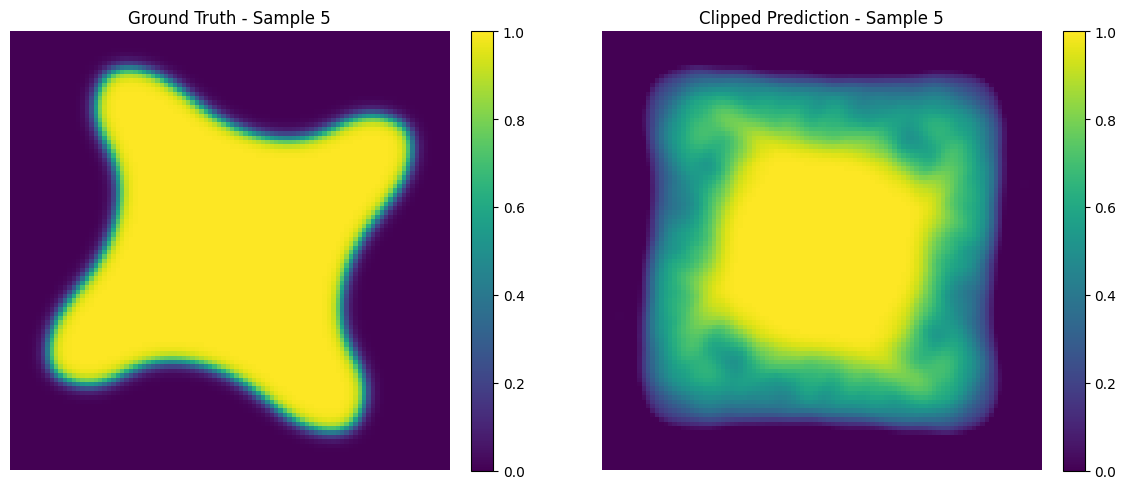

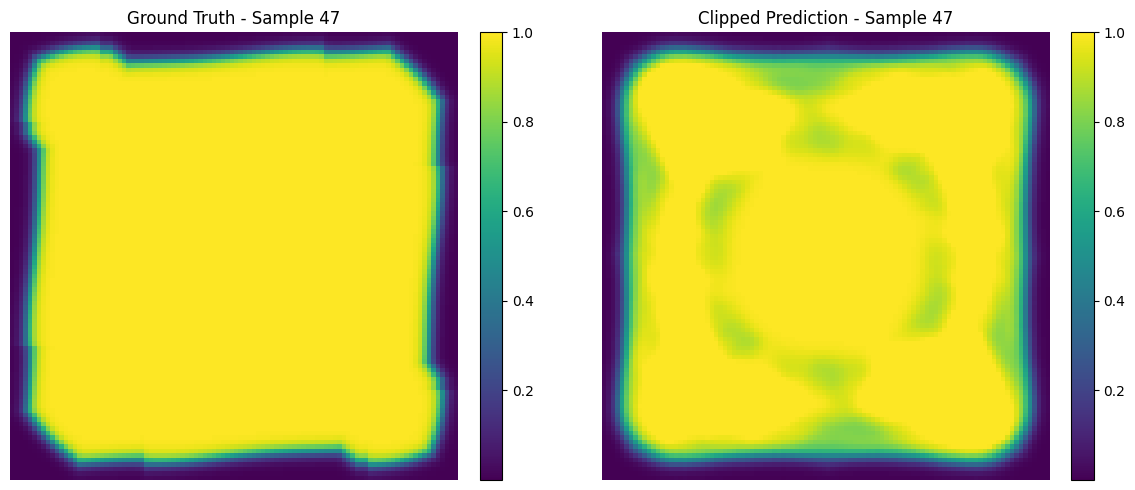

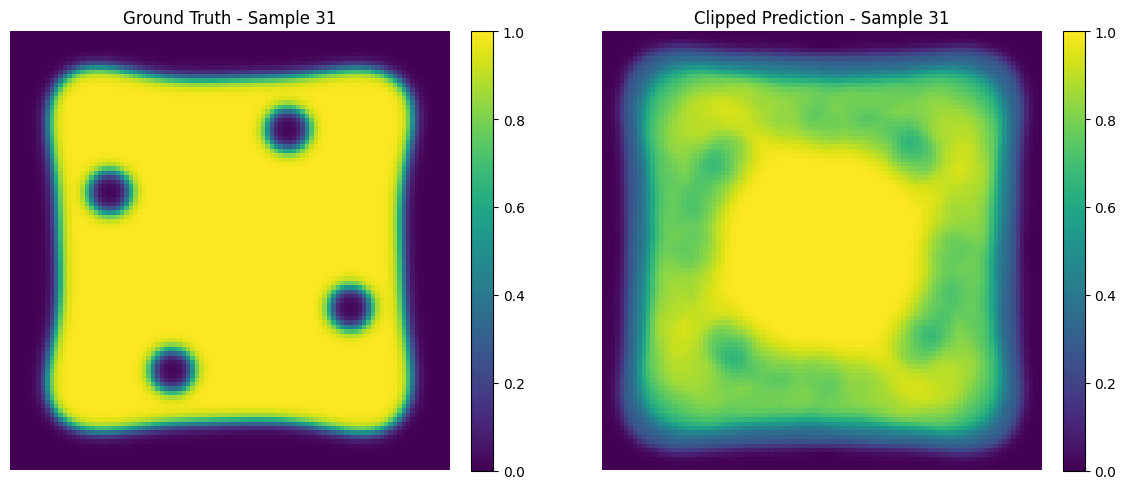

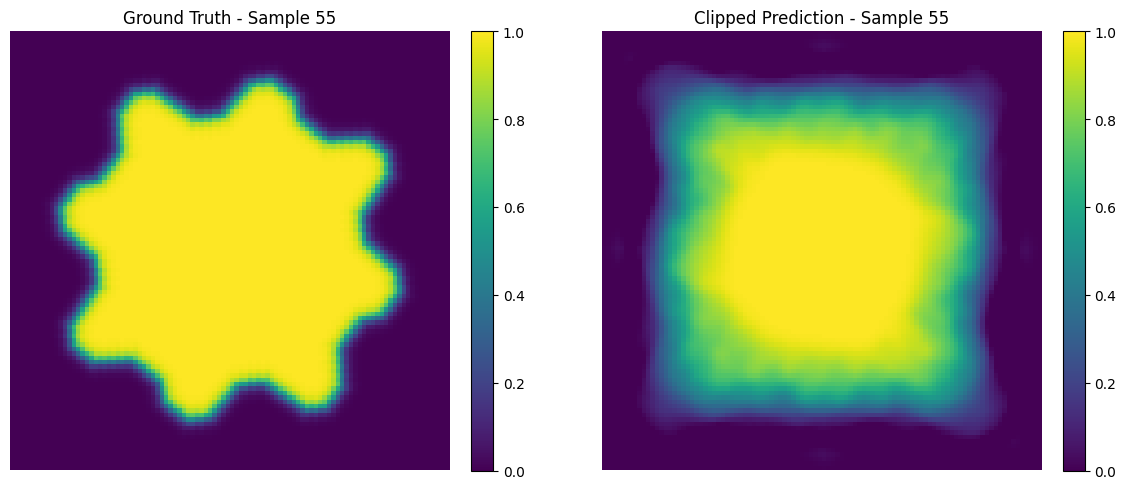

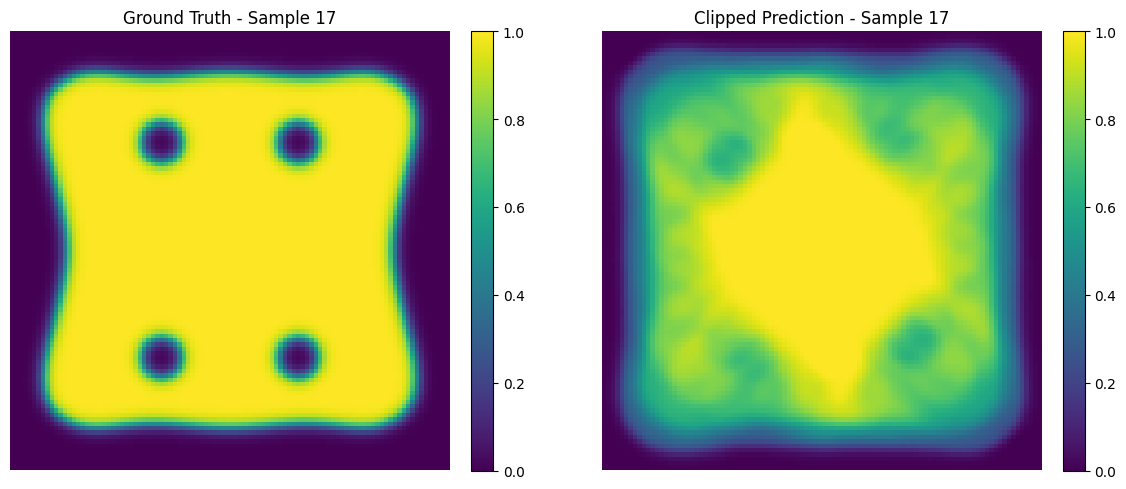

In [21]:
reconstruct_predictions_linear(linear_model_clean, X_test, y_test_flat, num_samples=5)


Outputs are little bit blurry but it is not too bad.

As for the outlier, more research need to be done. However, some explanations could be:

- Very low anisotropy (c=0.005) → nearly isotropic growth, suppressing clear dendritic arms.
- Small seed radius (0.08) → delays solidification and may produce underdeveloped structures.
- Could also be partially due to numerical diffusion at lower mesh resolution (100x100), which may smear out features and produce morphologies inconsistent with trends.